#### Neel Shah NUID- 001029882 Assignment 3 

### Part 1. Expand the basic code for building a DNN on the Pima Indian Diabetic Dataset to include:
(a) pre-process the data by scaling/standardizing the 8 columns

(b) Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data.

(c) Make Epoch versus train set accuracy, and validation set accuracy

(d) Report results using nice ROC curves, report AUC values. Feel free to use code form our course, or from elsewhere

(e) How would you increase dataset size? Try out at least two approaches and re-evaluate the model performance on this new and augmented dataset.

In [1]:
'''Import necessary packages'''

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc

%matplotlib inline

Using TensorFlow backend.


In [2]:
%pwd

'C:\\Users\\neell\\Documents\\DataScience\\Module9'

In [3]:
path = 'C:\\Users\\neell\\Documents\\DataScience\\Module9\\'

In [4]:
df = pd.read_csv(f'{path}/pima-indians-diabetes(2).data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


#### (a) pre-process the data by scaling/standardizing the 8 columns

In [5]:
#Separate out X and Y

X = df.iloc[:, :8]
Y = df.iloc[:, 8:9]

In [6]:
#Scaling

#subtract mean of that column from every value, then divide the results by the variable's standard deviation.
scaler = preprocessing.StandardScaler().fit(df)
df_sc = pd.DataFrame(scaler.transform(df))
df_sc.columns = [0,1,2,3,4,5,6,7,8]
print(df_sc.shape)
df_sc.head(2)



(768, 9)


,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120


#### b.Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data.

In [7]:
# Train- Test - Validation - Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.15, random_state=1)
(X_train, X_val, Y_train, Y_val) = train_test_split(X, Y, test_size=0.15, random_state=1)

print(X_train.shape,X_test.shape, X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape)

(652, 8) (116, 8) (116, 8) (652, 1) (116, 1) (116, 1)


### Hyperparameter tuning

In [8]:
#tuning batch size and epochs

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [11]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [12]:
# define the grid search parameters
batch_size = [5,10, 20, 40, 60]
epochs = [50, 100, 150]

param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val, Y_val)

In [13]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.655421 using {'batch_size': 60, 'epochs': 150}


In [14]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


In [15]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.594467 (0.036241) with: {'batch_size': 5, 'epochs': 50}
0.629105 (0.045138) with: {'batch_size': 5, 'epochs': 100}
0.612236 (0.017224) with: {'batch_size': 5, 'epochs': 150}
0.603464 (0.010545) with: {'batch_size': 10, 'epochs': 50}
0.620783 (0.007634) with: {'batch_size': 10, 'epochs': 100}
0.612686 (0.072783) with: {'batch_size': 10, 'epochs': 150}
0.603689 (0.019721) with: {'batch_size': 20, 'epochs': 50}
0.586370 (0.016972) with: {'batch_size': 20, 'epochs': 100}
0.603914 (0.049428) with: {'batch_size': 20, 'epochs': 150}
0.620783 (0.022284) with: {'batch_size': 40, 'epochs': 50}
0.620558 (0.033214) with: {'batch_size': 40, 'epochs': 100}
0.577823 (0.028545) with: {'batch_size': 40, 'epochs': 150}
0.620558 (0.033214) with: {'batch_size': 60, 'epochs': 50}
0.646649 (0.022395) with: {'batch_size': 60, 'epochs': 100}
0.655421 (0.029202) with: {'batch_size': 60, 'epochs': 150}


In [16]:
#Tuning optimizer
def create_model(optimizer='adam',kernel_initializer='uniform'):
    model = Sequential()
    model.add(Dense(10, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [17]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
kernel_initializer=['zeros','uniform','ones','random_uniform', 'truncated_normal','orthogonal']
param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val, Y_val)

In [18]:
#Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.680612 using {'kernel_initializer': 'uniform', 'optimizer': 'Adamax'}


In [19]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.645974 (0.056855) with: {'kernel_initializer': 'zeros', 'optimizer': 'SGD'}
0.637652 (0.038868) with: {'kernel_initializer': 'zeros', 'optimizer': 'RMSprop'}
0.646649 (0.042620) with: {'kernel_initializer': 'zeros', 'optimizer': 'Adagrad'}
0.586595 (0.038080) with: {'kernel_initializer': 'zeros', 'optimizer': 'Adadelta'}
0.621233 (0.049208) with: {'kernel_initializer': 'zeros', 'optimizer': 'Adam'}
0.586145 (0.005089) with: {'kernel_initializer': 'zeros', 'optimizer': 'Adamax'}
0.647548 (0.084387) with: {'kernel_initializer': 'zeros', 'optimizer': 'Nadam'}
0.586370 (0.016972) with: {'kernel_initializer': 'uniform', 'optimizer': 'SGD'}
0.603689 (0.028762) with: {'kernel_initializer': 'uniform', 'optimizer': 'RMSprop'}
0.638327 (0.038613) with: {'kernel_initializer': 'uniform', 'optimizer': 'Adagrad'}
0.620783 (0.022284) with: {'kernel_initializer': 'uniform', 'optimizer': 'Adadelta'}
0.629780 (0.039887) with: {'kernel_initializer': 'uniform', 'optimizer': 'Adam'}
0.680612 (0.081064) w

### Build and compile a deep learning model

In [20]:
# Build the deep neural network using the tuned parameters
model1 = Sequential()
model1.add(Dense(10, input_dim=8, kernel_initializer='uniform', activation='relu'))
model1.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [21]:
# Compile the DNN
model1.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

#### c.Make Epoch versus train set accuracy, and validation set accuracy

In [22]:
# Fit the DNN with your train data

history=model1.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=5)

Train on 652 samples, validate on 116 samples
Epoch 1/100
652/652 [==============================] - 0s 722us/step - loss: 0.6751 - accuracy: 0.6518 - val_loss: 0.6693 - val_accuracy: 0.6466
Epoch 2/100
652/652 [==============================] - 0s 375us/step - loss: 0.6596 - accuracy: 0.6518 - val_loss: 0.6707 - val_accuracy: 0.6466
Epoch 3/100
652/652 [==============================] - 0s 404us/step - loss: 0.6501 - accuracy: 0.6518 - val_loss: 0.6643 - val_accuracy: 0.6466
Epoch 4/100
652/652 [==============================] - 0s 443us/step - loss: 0.6358 - accuracy: 0.6733 - val_loss: 0.6658 - val_accuracy: 0.6638
Epoch 5/100
652/652 [==============================] - 0s 383us/step - loss: 0.6314 - accuracy: 0.6672 - val_loss: 0.6580 - val_accuracy: 0.6552
Epoch 6/100
652/652 [==============================] - 0s 328us/step - loss: 0.6114 - accuracy: 0.6794 - val_loss: 0.6626 - val_accuracy: 0.6121
Epoch 7/100
652/652 [==============================] - 0s 332us/step - loss: 0.6082 

652/652 [==============================] - 0s 249us/step - loss: 0.5300 - accuracy: 0.7347 - val_loss: 0.5847 - val_accuracy: 0.7069
Epoch 57/100
652/652 [==============================] - 0s 267us/step - loss: 0.5314 - accuracy: 0.7301 - val_loss: 0.5876 - val_accuracy: 0.7069
Epoch 58/100
652/652 [==============================] - 0s 248us/step - loss: 0.5295 - accuracy: 0.7362 - val_loss: 0.5826 - val_accuracy: 0.7414
Epoch 59/100
652/652 [==============================] - 0s 259us/step - loss: 0.5278 - accuracy: 0.7393 - val_loss: 0.5865 - val_accuracy: 0.7155
Epoch 60/100
652/652 [==============================] - 0s 275us/step - loss: 0.5272 - accuracy: 0.7423 - val_loss: 0.5770 - val_accuracy: 0.7241
Epoch 61/100
652/652 [==============================] - 0s 250us/step - loss: 0.5215 - accuracy: 0.7469 - val_loss: 0.5906 - val_accuracy: 0.7500
Epoch 62/100
652/652 [==============================] - 0s 241us/step - loss: 0.5271 - accuracy: 0.7393 - val_loss: 0.5836 - val_accuracy

In [23]:
# Evaluate the model
scores = model1.evaluate(X_val, Y_val)
print ("Accuracy: %.2f%%" %(scores[1]*100))

116/116 [==============================] - 0s 43us/step
Accuracy: 75.86%


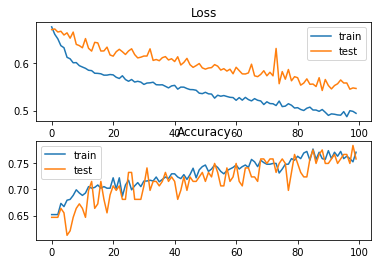

In [24]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

#### d.Report results using nice ROC curves, report AUC values. Feel free to use code form our course, or from elsewhere

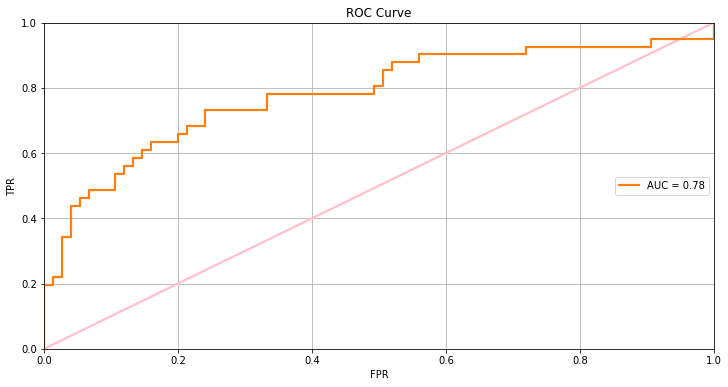

In [25]:
predict_probability = model1.predict_proba(X_test)[:]
FPR, TPR, threshold = roc_curve(Y_test, predict_probability)

plt.figure(figsize=(12,6))
plt.plot(FPR,TPR)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1], [0,1], color = 'pink', linewidth = 2.2)
plt.plot(FPR,TPR, linewidth = 2.2, label = 'AUC = %.2f' % auc(FPR,TPR))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc = "center right")

#### e. How would you increase dataset size? Try out at least two approaches and re-evaluate the model performance on this new and augmented dataset.

### Using RandomOverSampler to mitigate imbalance in the dataset and increase Data Size

In [26]:
from imblearn.over_sampling import RandomOverSampler
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(X,Y)


In [27]:
# Train- Test - Validation - Split
(X_train1, X_test1, Y_train1, Y_test1) = train_test_split(x_sampled, y_sampled, test_size=0.15, random_state=1)
(X_train1, X_val1, Y_train1, Y_val1) = train_test_split(x_sampled, y_sampled, test_size=0.15, random_state=1)

print(X_train1.shape,X_test1.shape, X_val1.shape,Y_train1.shape,Y_test1.shape,Y_val1.shape)

(850, 8) (150, 8) (150, 8) (850, 1) (150, 1) (150, 1)


In [28]:
history1=model1.fit(X_train1, Y_train1, validation_data=(X_val1, Y_val1), epochs=100, batch_size=5)

Train on 850 samples, validate on 150 samples
Epoch 1/100
850/850 [==============================] - 0s 285us/step - loss: 0.5199 - accuracy: 0.7776 - val_loss: 0.5766 - val_accuracy: 0.7333
Epoch 2/100
850/850 [==============================] - 0s 281us/step - loss: 0.5114 - accuracy: 0.7612 - val_loss: 0.5454 - val_accuracy: 0.7533
Epoch 3/100
850/850 [==============================] - 0s 280us/step - loss: 0.5128 - accuracy: 0.7694 - val_loss: 0.5626 - val_accuracy: 0.7533
Epoch 4/100
850/850 [==============================] - 0s 262us/step - loss: 0.5103 - accuracy: 0.7600 - val_loss: 0.6211 - val_accuracy: 0.6800
Epoch 5/100
850/850 [==============================] - 0s 289us/step - loss: 0.5173 - accuracy: 0.7471 - val_loss: 0.5916 - val_accuracy: 0.6933
Epoch 6/100
850/850 [==============================] - 0s 253us/step - loss: 0.5152 - accuracy: 0.7659 - val_loss: 0.5600 - val_accuracy: 0.7467
Epoch 7/100
850/850 [==============================] - 0s 257us/step - loss: 0.5059 

Epoch 57/100
850/850 [==============================] - 0s 248us/step - loss: 0.4889 - accuracy: 0.7718 - val_loss: 0.5730 - val_accuracy: 0.7267
Epoch 58/100
850/850 [==============================] - 0s 317us/step - loss: 0.4889 - accuracy: 0.7729 - val_loss: 0.5218 - val_accuracy: 0.7600
Epoch 59/100
850/850 [==============================] - 0s 354us/step - loss: 0.4852 - accuracy: 0.7706 - val_loss: 0.5712 - val_accuracy: 0.6733
Epoch 60/100
850/850 [==============================] - 0s 352us/step - loss: 0.4869 - accuracy: 0.7741 - val_loss: 0.5332 - val_accuracy: 0.7400
Epoch 61/100
850/850 [==============================] - 0s 286us/step - loss: 0.4881 - accuracy: 0.7812 - val_loss: 0.5205 - val_accuracy: 0.7533
Epoch 62/100
850/850 [==============================] - 0s 315us/step - loss: 0.4806 - accuracy: 0.7706 - val_loss: 0.5292 - val_accuracy: 0.7400
Epoch 63/100
850/850 [==============================] - 0s 281us/step - loss: 0.4800 - accuracy: 0.7835 - val_loss: 0.5528 -

In [29]:
scores = model1.evaluate(X_val1, Y_val1)
print ("Accuracy: %.2f%%" %(scores[1]*100))

150/150 [==============================] - 0s 33us/step
Accuracy: 76.00%


### Using Smote to increase dataset size

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)
y_smote = y_smote.rename(columns={8: "label"})


In [32]:
print(X.shape,Y.shape)
print(x_smote.shape,y_smote.shape)

(768, 8) (768, 1)
(1000, 8) (1000, 1)


In [33]:
a = y_smote.groupby(["label"]).agg({"label":'count'})
print(a)

       label
label       
0        500
1        500


<AxesSubplot:xlabel='label'>

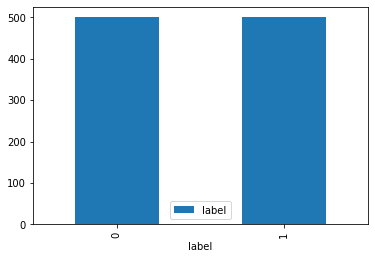

In [34]:
a.plot.bar()

In [35]:
# Train- Test - Validation - Split
(X_train2, X_test2, Y_train2, Y_test2) = train_test_split(x_smote, y_smote, test_size=0.15, random_state=1)
(X_train2, X_val2, Y_train2, Y_val2) = train_test_split(x_smote, y_smote, test_size=0.15, random_state=1)

print(X_train2.shape,X_test2.shape, X_val2.shape,Y_train2.shape,Y_test2.shape,Y_val2.shape)

(850, 8) (150, 8) (150, 8) (850, 1) (150, 1) (150, 1)


In [36]:
history2=model1.fit(X_train2, Y_train2, validation_data=(X_val2, Y_val2), epochs=100, batch_size=5)

Train on 850 samples, validate on 150 samples
Epoch 1/100
850/850 [==============================] - 0s 295us/step - loss: 0.4699 - accuracy: 0.7847 - val_loss: 0.4895 - val_accuracy: 0.7733
Epoch 2/100
850/850 [==============================] - 0s 253us/step - loss: 0.4707 - accuracy: 0.7800 - val_loss: 0.5284 - val_accuracy: 0.7200
Epoch 3/100
850/850 [==============================] - 0s 255us/step - loss: 0.4663 - accuracy: 0.7812 - val_loss: 0.5289 - val_accuracy: 0.7667
Epoch 4/100
850/850 [==============================] - 0s 337us/step - loss: 0.4743 - accuracy: 0.7800 - val_loss: 0.5069 - val_accuracy: 0.7400
Epoch 5/100
850/850 [==============================] - 0s 364us/step - loss: 0.4678 - accuracy: 0.7729 - val_loss: 0.5084 - val_accuracy: 0.7400
Epoch 6/100
850/850 [==============================] - 0s 381us/step - loss: 0.4628 - accuracy: 0.7965 - val_loss: 0.5211 - val_accuracy: 0.7267
Epoch 7/100
850/850 [==============================] - 0s 445us/step - loss: 0.4678 

850/850 [==============================] - 0s 276us/step - loss: 0.4567 - accuracy: 0.7812 - val_loss: 0.5247 - val_accuracy: 0.7400
Epoch 57/100
850/850 [==============================] - 0s 253us/step - loss: 0.4539 - accuracy: 0.8024 - val_loss: 0.4901 - val_accuracy: 0.7867
Epoch 58/100
850/850 [==============================] - 0s 274us/step - loss: 0.4649 - accuracy: 0.7847 - val_loss: 0.5227 - val_accuracy: 0.7267
Epoch 59/100
850/850 [==============================] - 0s 243us/step - loss: 0.4543 - accuracy: 0.7965 - val_loss: 0.5141 - val_accuracy: 0.7200
Epoch 60/100
850/850 [==============================] - 0s 252us/step - loss: 0.4563 - accuracy: 0.8000 - val_loss: 0.5688 - val_accuracy: 0.6800
Epoch 61/100
850/850 [==============================] - 0s 247us/step - loss: 0.4637 - accuracy: 0.7812 - val_loss: 0.5135 - val_accuracy: 0.7400
Epoch 62/100
850/850 [==============================] - 0s 247us/step - loss: 0.4521 - accuracy: 0.7894 - val_loss: 0.4987 - val_accuracy

In [37]:
scores = model1.evaluate(X_val2, Y_val2)
print ("Accuracy: %.2f%%" %(scores[1]*100))

150/150 [==============================] - 0s 33us/step
Accuracy: 75.33%


# Part 2

**2. Please describe at least to ways of ensembling together DNNs and RFs. Take any dataset from Kaggle and (1) train an RF model, (2) train a DNN, and (3) a hybrid DNN and RF model. Provide detailed model and result comparisons.**

In [38]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
#importing diabetes toy dataset from scikitlearn
from sklearn import datasets
dataset = datasets.load_diabetes()
data, target = dataset.data, dataset.target

In [40]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [41]:
features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
targets = dataset.target

In [42]:
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)

In [46]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.442
Test data R-2 score: 0.431
Test data Spearman correlation: 0.622
Test data Pearson correlation: 0.658


#### Training Dataset based on DNN

In [47]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd


In [48]:
# See head of the dataset
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale both the training inputs and outputs
scaled_train = scaler.fit_transform(features)
#scaled_test = scaler.transform(test_df)

In [51]:
scaled_train

array([[0.66666667, 1.        , 0.58264463, ..., 0.28208745, 0.56221737,
        0.43939394],
       [0.48333333, 0.        , 0.14876033, ..., 0.14104372, 0.22244301,
        0.16666667],
       [0.88333333, 1.        , 0.51652893, ..., 0.28208745, 0.49658437,
        0.40909091],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.24964739, 0.30504048,
        0.56060606],
       [0.28333333, 0.        , 0.49586777, ..., 0.39351199, 0.65702021,
        0.40909091],
       [0.28333333, 0.        , 0.0661157 , ..., 0.14104372, 0.46930778,
        0.51515152]])

In [52]:
scaled_train_df = pd.DataFrame(scaled_train, columns=dataset.feature_names)

In [53]:
scaled_train_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333
...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605670,0.530303
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415790,0.666667
439,0.683333,1.0,0.285124,0.530516,0.318627,0.323705,0.272727,0.249647,0.305040,0.560606
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657020,0.409091


In [54]:
X=scaled_train_df.values

In [55]:
Y = dataset.target
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [56]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(1))

In [57]:
model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [58]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5)

Train on 353 samples, validate on 89 samples
Epoch 1/100
353/353 [==============================] - 0s 785us/step - loss: 29668.1349 - accuracy: 0.0000e+00 - val_loss: 26443.9714 - val_accuracy: 0.0000e+00
Epoch 2/100
353/353 [==============================] - 0s 299us/step - loss: 29462.9697 - accuracy: 0.0000e+00 - val_loss: 26133.4720 - val_accuracy: 0.0000e+00
Epoch 3/100
353/353 [==============================] - 0s 308us/step - loss: 28947.6223 - accuracy: 0.0000e+00 - val_loss: 25459.0686 - val_accuracy: 0.0000e+00
Epoch 4/100
353/353 [==============================] - 0s 342us/step - loss: 27986.3990 - accuracy: 0.0000e+00 - val_loss: 24317.2616 - val_accuracy: 0.0000e+00
Epoch 5/100
353/353 [==============================] - 0s 325us/step - loss: 26479.1427 - accuracy: 0.0000e+00 - val_loss: 22618.6751 - val_accuracy: 0.0000e+00
Epoch 6/100
353/353 [==============================] - 0s 331us/step - loss: 24381.0268 - accuracy: 0.0000e+00 - val_loss: 20406.0855 - val_accuracy: 

353/353 [==============================] - 0s 366us/step - loss: 3299.3717 - accuracy: 0.0028 - val_loss: 3004.3668 - val_accuracy: 0.0225
Epoch 54/100
353/353 [==============================] - 0s 409us/step - loss: 3285.9862 - accuracy: 0.0057 - val_loss: 2996.5952 - val_accuracy: 0.0225
Epoch 55/100
353/353 [==============================] - 0s 387us/step - loss: 3264.8360 - accuracy: 0.0028 - val_loss: 2989.8155 - val_accuracy: 0.0225
Epoch 56/100
353/353 [==============================] - 0s 393us/step - loss: 3254.6491 - accuracy: 0.0028 - val_loss: 2984.1933 - val_accuracy: 0.0225
Epoch 57/100
353/353 [==============================] - 0s 431us/step - loss: 3243.0775 - accuracy: 0.0085 - val_loss: 2977.3707 - val_accuracy: 0.0225
Epoch 58/100
353/353 [==============================] - 0s 368us/step - loss: 3236.1111 - accuracy: 0.0000e+00 - val_loss: 2971.3835 - val_accuracy: 0.0112
Epoch 59/100
353/353 [==============================] - 0s 410us/step - loss: 3218.3576 - accurac

#### Making a Hybrid Model, combining DNN and RF and combining the outputs of the two.


#### We are using the Averaging Ensembling Technique. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

In [59]:
prediction_DNN = model2.predict(X[:1])

In [60]:
prediction_DNN

array([[656.6555]], dtype=float32)

In [61]:
prediction_RandomForest = rf.predict(X[:1])

In [62]:
prediction_RandomForest

array([251.27])

In [63]:
X[:10]

array([[0.66666667, 1.        , 0.58264463, 0.54929577, 0.29411765,
        0.25697211, 0.20779221, 0.28208745, 0.56221737, 0.43939394],
       [0.48333333, 0.        , 0.14876033, 0.35211268, 0.42156863,
        0.30677291, 0.62337662, 0.14104372, 0.22244301, 0.16666667],
       [0.88333333, 1.        , 0.51652893, 0.43661972, 0.28921569,
        0.25896414, 0.24675325, 0.28208745, 0.49658437, 0.40909091],
       [0.08333333, 0.        , 0.30165289, 0.30985915, 0.49509804,
        0.44721116, 0.23376623, 0.42313117, 0.57293604, 0.46969697],
       [0.51666667, 0.        , 0.20661157, 0.54929577, 0.46568627,
        0.41733068, 0.38961039, 0.28208745, 0.36236911, 0.33333333],
       [0.06666667, 0.        , 0.19008264, 0.38028169, 0.20588235,
        0.11553785, 0.50649351, 0.        , 0.32698571, 0.15151515],
       [0.28333333, 1.        , 0.16528926, 0.3943662 , 0.30882353,
        0.28884462, 0.36363636, 0.14104372, 0.24330119, 0.36363636],
       [0.78333333, 1.        , 0.3388429

In [64]:
pred1=model2.predict(X[:10])
pred2=rf.predict(X[:10])

In [65]:
pred1

array([[656.6556 ],
       [282.45355],
       [568.4486 ],
       [599.1398 ],
       [509.00797],
       [355.4962 ],
       [219.69685],
       [440.28134],
       [516.17676],
       [744.5472 ]], dtype=float32)

In [66]:
pred1 = pred1.flatten() 

In [67]:
pred1

array([656.6556 , 282.45355, 568.4486 , 599.1398 , 509.00797, 355.4962 ,
       219.69685, 440.28134, 516.17676, 744.5472 ], dtype=float32)

In [68]:
pred1=np.array(pred1)
pred1

array([656.6556 , 282.45355, 568.4486 , 599.1398 , 509.00797, 355.4962 ,
       219.69685, 440.28134, 516.17676, 744.5472 ], dtype=float32)

In [69]:
pred2=np.array(pred2)
pred2

array([251.27 , 253.034, 251.27 , 250.57 , 250.57 , 256.526, 253.974,
       251.27 , 251.27 , 250.57 ])

In [70]:
out_arr = np.add(pred2, pred1)/2

In [71]:
out_arr

array([453.96278931, 267.74377612, 409.8593042 , 424.85488525,
       379.78898254, 306.01109265, 236.83542682, 345.77567078,
       383.72337891, 497.55859009])

In [72]:
Y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

#### On looking at the outputs we can say that the Hybrid approach is more accurate than the DNN model or the RF model used separately.